In [11]:
#Day 1 Answer 1
with open("input1.txt") as fil:
    arr = fil.read().splitlines()
arr = list(map(int, arr))

In [16]:
import matplotlib.pyplot as plt
#plt.plot(arr)
print("Answer for Day 1 Part 1 is ", sum(arr))

Answer 1 is  525


In [17]:
#Day 1 Answer 2 
arr2 = 2*arr
# real value was arr2 = 200*arr
for x in range(1, len(arr2)):
    if (x%20000 == 0):
       print(x)
    arr2[x] = arr2[x-1] + arr2[x]
print("Done with sum")
print(len(arr2))
#plt.plot(arr2)
for x in range(1, len(arr2)):
    if (x%10000 == 0):
       print(x)
    if (arr2[x] in arr2[0:x]):
        print(x, arr2[x]) 
        break
print("Done with comparison")
print("Answer for Day 1 Part 2 is 75749")

Done with sum
2036
Done with comparison
Answer was 75749


In [18]:
#Day 2 Answer 1
with open("input2.txt") as fil:
    arr = fil.read().splitlines()

In [19]:
n_dup = 0
n_trip = 0
for ii in range(0, len(arr)):
    arrl = list(arr[ii])
    if (any(arrl.count(x) == 2 for x in arrl)):
        n_dup += 1
    if (any(arrl.count(x) == 3 for x in arrl)):
        n_trip += 1
print('Answer for Day 2 Part 1 is ', n_dup*n_trip)

Answer is  6944


In [20]:
#Day 2 Answer 2
for ii in range(0, len(arr)):
    for jj in range(0, len(arr)):
        if (ii != jj):
            arr1 = arr[ii]
            arr2 = arr[jj]
            val = [i for i in range(0,26) if arr1[i] != arr2[i]]
            if (len(val) == 1):
                print(val)
                print(arr1)
                print(arr2)
                break

[15]
srijafjzloguvlnvtqmphenbkd
srijafjzloguvlnctqmphenbkd
[15]
srijafjzloguvlnctqmphenbkd
srijafjzloguvlnvtqmphenbkd


In [286]:
#Day 3 Answer 1
import numpy as np
with open("input3.txt") as fil:
    arr = fil.read().splitlines()
print(arr[0])

#1 @ 12,548: 19x10


In [287]:
vals = np.zeros((7, len(arr)))
for ii in range(0, len(arr)):
    num, val = arr[ii].split(" @ ")
    xloc, val = val.split(",")
    yloc, val = val.split(": ")
    xd, yd = val.split("x")
    vals[3, ii] = float(xd)
    vals[4, ii] = float(yd)
    vals[1, ii] = float(xloc)
    vals[2, ii] = float(yloc)
    vals[0, ii] = float(num.split("#")[1])
    vals[5, ii] = float(xd) + float(xloc)
    vals[6, ii] = float(yd) + float(yloc)
print(max(vals[6,:]), max(vals[5,:]))

999.0 1000.0


In [288]:
bigarr = np.zeros((1001,1001))
for ii in range(0, len(arr)):
      for jj in range(int(vals[2, ii]), int(vals[6, ii])):
        bigarr[int(vals[1,ii]):int(vals[5,ii]), jj] += 1
val = [bigarr > 1]
np.sum(val)

118840

In [289]:
#Day 3 Answer 2
for ii in range(0, len(arr)):
    val1 = vals[3,ii] * vals[4,ii]
    val2 = np.sum(bigarr[int(vals[1,ii]):int(vals[5,ii]),int(vals[2, ii]):int(vals[6, ii])])
    if (val1 == val2):
        print('Answer for Day 3 Part 2 is ', vals[0,ii])

Answer is  919.0


In [308]:
#Day 4 Answer 1
with open("input4.txt") as fil:
    arr = fil.read().splitlines()
arr.sort()
for i in range(75,85):
    print(arr[i])

[1518-03-18 23:57] Guard #1307 begins shift
[1518-03-19 00:45] falls asleep
[1518-03-19 00:55] wakes up
[1518-03-19 23:59] Guard #1153 begins shift
[1518-03-21 00:03] Guard #2333 begins shift
[1518-03-21 00:16] falls asleep
[1518-03-21 00:28] wakes up
[1518-03-22 00:00] Guard #1117 begins shift
[1518-03-22 00:24] falls asleep
[1518-03-22 00:32] wakes up


In [292]:
# Figure out number of guards
guards = [arr[0], arr[5]]
for i in range(6, len(arr)):
    if "Guard" in arr[i]:
        guards.append(arr[i])
len(guards)

265

In [293]:
guardnum = np.zeros(265)

In [327]:
for i in range(0, len(guards)):
    if len(guards[i]) == 43:
        guardnum[i] = int(guards[i][26:30])
    if len(guards[i]) == 42:
        guardnum[i] = int(guards[i][26:29])
guardnums = list(set(guardnum))
bigarr = np.zeros((len(guardnums), 60))
arr2 = arr[1]
print(arr2[15:17])

08


In [1]:
i = 0
while i < len(arr):
    if "Guard" in arr[i]:
        if len(arr[i]) == 43:
            gn = int(arr[i][26:30])
            i += 1
            if "Guard" in arr[i]:
                gn = int(arr[i][26:30])
                i += 1
        if len(arr[i]) == 42:
            gn = int(arr[i][26:29])
            i += 1
            if "Guard" in arr[i]:
                gn = int(arr[i][26:30])
                i += 1
    tm1 = int(arr[i][15:17])
    tm2 = int(arr[i+1][15:17])
    ix = guardnums.index(gn)
#    print(ix, tm1, tm2)
    bigarr[ix, tm1:tm2] += 1
    i += 2

NameError: name 'arr' is not defined

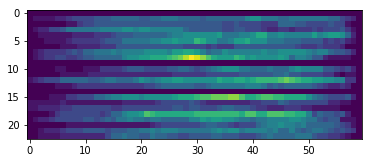

In [321]:
plt.imshow(bigarr)
#plt.plot(bigarr[4,:], '.')
#for i in range(0,60):
#    print(i, bigarr[4, i])

In [342]:
for i in range(0,len(guardnums)):
    print(i, guardnums[i], bigarr[i,:].sum())
maxval = np.where(bigarr[12,:] == bigarr[12,:].max())
#plt.plot(bigarr[12,:],'.')
print('Answer for Day 4 Part 1 is ', maxval[0]*guardnums[12])

0 1153.0 0.0
1 3203.0 315.0
2 269.0 224.0
3 2447.0 302.0
4 1307.0 362.0
5 1051.0 343.0
6 2333.0 195.0
7 2851.0 412.0
8 163.0 447.0
9 1061.0 0.0
10 691.0 265.0
11 2617.0 161.0
12 1601.0 483.0
13 1091.0 246.0
14 967.0 0.0
15 2267.0 476.0
16 1117.0 144.0
17 349.0 188.0
18 2399.0 468.0
19 353.0 353.0
20 3559.0 206.0
21 2153.0 343.0
22 509.0 246.0
Answer is  [73646.]


In [358]:
#Day 4 Answer 2
#print(bigarr.max(), np.where(bigarr == bigarr.max()))
print('Answer for Day 4 Part 2 is ', guardnums[int(np.where(bigarr == bigarr.max())[0])]* np.where(bigarr == bigarr.max())[1])

Answer is  [4727.]


In [151]:
#Day 5 Answer 1
with open("input5.txt") as fil:
    arr = fil.read()
arr = arr[0:50000]
print(len(arr))

50001
50000


In [152]:
newstr = ''
while (newstr != arr):
    newstr = arr
    i=0
    while i < len(arr)-1:
        minstr = arr[i:i+2]
#        print(minstr)
        if ((minstr[0] != minstr[1]) and (minstr[0].lower() == minstr[1].lower())):
            arr = arr[0:i] + arr[i+2:]
#            print(arr, minstr)
            i -=1
        i += 1
 #   print(len(arr))

In [153]:
print('Answer for Day 5 Part 1 is ', len(arr))

Answer for Day 5 Part 1 is  9686


In [207]:
#Day 5 Part 2
import numpy as np
with open("input5.txt") as fil:
    arrt = fil.read()
arrt = arrt[0:len(arrt)-1]
lens = np.zeros(26)

In [209]:
import re
import string
print(len(arr), len(arrt))
alphl = list(string.ascii_lowercase)
alphu = list(string.ascii_uppercase)
for jj in range(0, 26):
    arr = arrt
    arr = re.sub(alphl[jj], '', arr)
    arr = re.sub(alphu[jj], '', arr)
    print(jj, len(arr), len(arrt))
    newstr = ''
    while (newstr != arr):
        newstr = arr
        i=0
        while i < len(arr)-1:
            minstr = arr[i:i+2]
#        print(minstr)
            if ((minstr[0] != minstr[1]) and (minstr[0].lower() == minstr[1].lower())):
                arr = arr[0:i] + arr[i+2:]
#            print(arr, minstr)
                i -=1
            i += 1
    lens[jj] = len(arr)

0 50000
48050 50000
48104 50000
48130 50000
48088 50000
48108 50000
48200 50000
48006 50000
48052 50000
48052 50000
48038 50000
48010 50000
48178 50000
47982 50000
48032 50000
48130 50000
48138 50000
48012 50000
48082 50000
48020 50000
48096 50000
48050 50000
48006 50000
48110 50000
48136 50000
48126 50000
48064 50000


In [212]:
print('Answer for Day 5 Part 2 is ', min(lens))

Answer for Day 5 Part 2 is  5524.0


In [ ]:
#Day 6 Part 1
